In [35]:
import numpy as np
import networkx as nx
import pandas as pd
import cechmate as cm
from persim import plot_diagrams
import matplotlib.pyplot as plt
import os

In [2]:
from scipy import interpolate
from scipy import optimize

In [28]:
from gtda.diagrams import PairwiseDistance
import pickle
from homology_modules import *

# Heuristic to find best probability estimation
The idea is to iterate two steps:
- sample the most probable small world random graph
- create a spline to interpolate de distances and find the minimum

This heuristic does not work     

In [25]:
rng=np.random.default_rng(0)
costs=np.linspace(1/44,1, 100)
homology_dimensions=[1,2,3,4]
probs=np.linspace(0,0.5,10)
small_worlds=[small_world_simulator(prob,homology_dimensions,costs,seed=rng.integers(0,1000000),n_samples_per_step=10) for prob in probs ]

KeyboardInterrupt: 

In [16]:
#with open("data.diagrams_small_world", "wb") as f:
#  pickle.dump(small_worlds, f, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open("DATA/data.diagrams_small_world","rb") as f:
  small_worlds=pickle.load(f)

In [6]:
with open("DATA/data.diagrams_coma", "rb") as f:
  (diagrams_coma,VR_coma)=pickle.load( f)

In [6]:
rng=np.random.default_rng(0)
costs=np.linspace(1/44,1, 100)
homology_dimensions=[1,2,3,4]
probs=np.linspace(0,0.5,10)
distances,variances=compute_distances(diagrams_coma,small_worlds, homology_dimensions,costs,0)
distances

array([[124.62228469,  59.71383289,  55.42424134,  51.52257868,
         55.08652318,  52.99050467,  59.76022798,  58.97785959,
         57.96922778,  62.0576039 ],
       [102.35542322,  59.03024854,  61.2694342 ,  61.97709902,
         68.74157895,  69.44824739,  74.03472585,  74.30051004,
         73.26393916,  76.54873538],
       [136.27371217,  71.54774984,  71.51819966,  68.46760444,
         71.30142611,  67.65472845,  73.61703083,  71.92581876,
         68.95402216,  72.44025227],
       [147.16035693,  81.34941354,  72.33353301,  61.07164532,
         51.74031374,  41.50300444,  41.21561843,  34.72316259,
         29.18053366,  30.29157007],
       [146.13788641,  78.69686797,  77.18285792,  72.59377596,
         72.63433065,  67.97020868,  74.03336614,  70.3658652 ,
         66.34092104,  69.3377137 ],
       [118.60763403,  60.20922942,  60.69871454,  58.97860779,
         63.5618594 ,  62.06190667,  68.21882388,  67.50310318,
         65.58957308,  69.4041509 ],
       [14

In [7]:
prob_estimates(distances,probs)

array([0.16666667, 0.05555556, 0.27777778, 0.44444444, 0.44444444,
       0.16666667, 0.44444444, 0.        , 0.05555556, 0.16666667,
       0.11111111, 0.44444444, 0.27777778, 0.16666667, 0.16666667,
       0.27777778, 0.05555556])

In [9]:
estimated_probability=[]
estimated_distance=[]
for i in range(len(distances)):
    tks=distance_spline(distances[i,:],probs)
    minimum_x,minimum_fun = optimize_spline(tks,probs)
    estimated_probability.append(minimum_x)
    estimated_distance.append(minimum_fun)
    

In [11]:
estimated_probability

[0.16721549521622453,
 0.0704503033391169,
 0.16812143583032246,
 0.4653613800704405,
 0.45319243581373336,
 0.16337961674706966,
 0.27517518778569083,
 4.469534883430863e-06,
 0.16473656428242284,
 0.08329647534685311,
 0.081347285243987,
 0.4554002520583702,
 0.275666440635907,
 0.16070641377372752,
 0.15960788991838526,
 0.274320279256573,
 0.06341474970297949]

In [31]:
estimated_distance

[array(51.52156432),
 array(57.80174606),
 array(68.46082454),
 array(28.65523394),
 array(66.24886649),
 array(58.94653383),
 array(70.17297383),
 array(73.25618228),
 array(74.84537976),
 array(41.98851451),
 array(44.34423677),
 array(70.22609249),
 array(52.83494159),
 array(48.78961814),
 array(44.64901756),
 array(45.07345073),
 array(50.34234549)]

In [14]:
probs=estimated_probability

small_worlds_estimated=[small_world_simulator(prob,homology_dimensions,costs,seed=rng.integers(0,1000000),n_samples_per_step=10) for prob in probs ]

/Users/simonechiominto/Dropbox (Politecnico Di Torino Studenti)/grenoble/progetto/project_git/from_corr_to_graph.py:58: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  MST=nx.adjacency_matrix(tree.minimum_spanning_tree(totalgraph).to_undirected()).todense()
/Users/simonechiominto/Dropbox (Politecnico Di Torino Studenti)/grenoble/progetto/project_git/from_corr_to_graph.py:58: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  MST=nx.adjacency_matrix(tree.minimum_spanning_tree(totalgraph).to_undirected()).todense()
/Users/simonechiominto/Dropbox (Politecnico Di Torino Studenti)/grenoble/progetto/project_git/from_corr_to_graph.py:58: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  MST=nx.adjacency_matrix(tree.minimum_spanning_tree(totalgraph).to_undirected()).todense()
/Users/simonechiominto/Dropbox (Politecnico Di Torino Stud

In [25]:
distances_appo,variances_appo=compute_distances(diagrams_coma,small_worlds_estimated, homology_dimensions,costs,0)
#distances_estimated,variances_estimated=[(distances_appo[i,i],variances_appo[i,i]) for i in range(len(distances_appo))]

In [26]:
distances_appo

array([[ 51.33376688,  60.34831568,  52.40914872,  61.24053775,
         61.0590055 ,  51.87912029,  53.00080567, 120.86561704,
         51.73513447,  57.60642603,  52.46765997,  60.269952  ,
         53.37445537,  50.89263382,  49.8173017 ,  56.8224977 ,
         61.07733184],
       [ 63.81451658,  60.93104345,  65.85560719,  76.10623173,
         75.89965934,  64.58319192,  69.10138759,  99.4102639 ,
         63.07142982,  59.96723813,  58.98950161,  75.17820927,
         68.74625662,  62.74559338,  61.7529084 ,  72.91748792,
         60.94811056],
       [ 68.59905507,  73.4450064 ,  69.16824996,  72.31067472,
         73.96631612,  68.04308834,  68.59390625, 132.33583324,
         68.65592941,  71.35339338,  65.71977674,  72.17401687,
         69.41891582,  68.3029211 ,  66.24243485,  72.64754373,
         73.7378172 ],
       [ 60.66723373,  80.48441684,  57.13290752,  31.04635133,
         34.62979668,  60.81738508,  41.58776047, 143.39197127,
         60.61627641,  76.76045616,

In [28]:
distances_estimated=np.diag(distances_appo)


In [32]:
distances_estimated

array([51.33376688, 60.93104345, 69.16824996, 31.04635133, 72.16055926,
       59.46950798, 71.08413649, 73.20988732, 75.80952667, 44.19261584,
       41.75761742, 73.86583667, 54.90481732, 46.6118804 , 41.97127269,
       50.14122537, 52.47913322])

In [34]:
estimated_distance

[array(51.52156432),
 array(57.80174606),
 array(68.46082454),
 array(28.65523394),
 array(66.24886649),
 array(58.94653383),
 array(70.17297383),
 array(73.25618228),
 array(74.84537976),
 array(41.98851451),
 array(44.34423677),
 array(70.22609249),
 array(52.83494159),
 array(48.78961814),
 array(44.64901756),
 array(45.07345073),
 array(50.34234549)]

In [40]:
distances_new=np.concatenate([distances,distances_appo],axis=1)
distances_new



array([[124.62228469,  59.71383289,  55.42424134,  51.52257868,
         55.08652318,  52.99050467,  59.76022798,  58.97785959,
         57.96922778,  62.0576039 ,  51.33376688,  60.34831568,
         52.40914872,  61.24053775,  61.0590055 ,  51.87912029,
         53.00080567, 120.86561704,  51.73513447,  57.60642603,
         52.46765997,  60.269952  ,  53.37445537,  50.89263382,
         49.8173017 ,  56.8224977 ,  61.07733184],
       [102.35542322,  59.03024854,  61.2694342 ,  61.97709902,
         68.74157895,  69.44824739,  74.03472585,  74.30051004,
         73.26393916,  76.54873538,  63.81451658,  60.93104345,
         65.85560719,  76.10623173,  75.89965934,  64.58319192,
         69.10138759,  99.4102639 ,  63.07142982,  59.96723813,
         58.98950161,  75.17820927,  68.74625662,  62.74559338,
         61.7529084 ,  72.91748792,  60.94811056],
       [136.27371217,  71.54774984,  71.51819966,  68.46760444,
         71.30142611,  67.65472845,  73.61703083,  71.92581876,
  

In [90]:
probs=np.linspace(0,0.5,10)
probs_new=np.concatenate([probs,np.array(estimated_probability)])

index=np.argsort(probs_new)
(distances_new[3,index],probs_new[index])


(array([147.16035693, 143.39197127,  81.34941354,  82.74996082,
         80.48441684,  69.65675033,  76.76045616,  72.33353301,
         59.06026321,  60.95087584,  60.81738508,  60.61627641,
         61.07164532,  60.66723373,  57.13290752,  51.74031374,
         45.71127356,  41.58776047,  42.55517043,  41.50300444,
         41.21561843,  34.72316259,  29.18053366,  34.62979668,
         30.93629551,  31.04635133,  30.29157007]),
 array([0.00000000e+00, 4.46953488e-06, 5.55555556e-02, 6.34147497e-02,
        7.04503033e-02, 8.13472852e-02, 8.32964753e-02, 1.11111111e-01,
        1.59607890e-01, 1.60706414e-01, 1.63379617e-01, 1.64736564e-01,
        1.66666667e-01, 1.67215495e-01, 1.68121436e-01, 2.22222222e-01,
        2.74320279e-01, 2.75175188e-01, 2.75666441e-01, 2.77777778e-01,
        3.33333333e-01, 3.88888889e-01, 4.44444444e-01, 4.53192436e-01,
        4.55400252e-01, 4.65361380e-01, 5.00000000e-01]))

In [95]:
estimated_probability_new=[]
estimated_distance_new=[]
for i in range(len(distances)):
    index=np.argsort(probs_new)
    tks=distance_spline(distances_new[i,index],probs_new[index])
    minimum_x,minimum_fun = optimize_spline(tks,probs_new[index])
    estimated_probability_new.append(minimum_x)
    estimated_distance_new.append(minimum_fun)

In [96]:
estimated_probability_new

[0.2953660123003477,
 0.13959933959516027,
 0.29758777779590484,
 0.19274241548602003,
 0.29761900197359803,
 0.29637635041686483,
 0.2976148064359372,
 0.20239846958861873,
 0.29666782383640167,
 0.29621592361106835,
 0.29576755653884246,
 0.2978313480814953,
 0.29743450680947275,
 0.2968827456213079,
 0.29666535964983576,
 0.2977609480627335,
 0.08270323500645374]

In [97]:
estimated_distance_new

[array(45.49523025),
 array(54.25484765),
 array(47.27150243),
 array(2.56796483),
 array(46.1725999),
 array(51.4641072),
 array(48.65110704),
 array(97.04559677),
 array(66.19565538),
 array(36.13165806),
 array(45.27239881),
 array(48.49332866),
 array(33.24083676),
 array(34.48235215),
 array(34.20347363),
 array(10.81785289),
 array(54.92478006)]

In [6]:
index=np.argsort(probs_new)
probs_new[index]
print(index)
print(distances_new[0,:])
print(distances_new[0,index])

NameError: name 'probs_new' is not defined

# New filtration

In [8]:
G=nx.barbell_graph(10,5)

In [9]:
cliques_temp=list(nx.enumerate_all_cliques(G))

In [10]:
cliques_temp

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [6, 7],
 [6, 8],
 [6, 9],
 [7, 8],
 [7, 9],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [15, 17],
 [15, 18],
 [15, 19],
 [15, 20],
 [15, 21],
 [15, 22],
 [15, 23],
 [15, 24],
 [16, 17],
 [16, 18],
 [16, 19],
 [16, 20],
 [16, 21],
 [16, 22],
 [16, 23],
 [16, 24],
 [17, 18],
 [17, 19],
 [17, 20],
 [17, 21],
 [17, 22],
 [17, 23],
 [17, 24],
 [18, 19],
 [18, 20],
 [18, 21],
 [18, 22],
 [18, 23],
 [18, 24],
 [19, 20],
 [19, 21],
 [19, 22],
 [

In [12]:
max_dim=2
cliques=[clique for clique in cliques_temp if (len(clique)-2<=max_dim)]

In [13]:
cliques

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [6, 7],
 [6, 8],
 [6, 9],
 [7, 8],
 [7, 9],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [15, 17],
 [15, 18],
 [15, 19],
 [15, 20],
 [15, 21],
 [15, 22],
 [15, 23],
 [15, 24],
 [16, 17],
 [16, 18],
 [16, 19],
 [16, 20],
 [16, 21],
 [16, 22],
 [16, 23],
 [16, 24],
 [17, 18],
 [17, 19],
 [17, 20],
 [17, 21],
 [17, 22],
 [17, 23],
 [17, 24],
 [18, 19],
 [18, 20],
 [18, 21],
 [18, 22],
 [18, 23],
 [18, 24],
 [19, 20],
 [19, 21],
 [19, 22],
 [

In [15]:
filtration=[(clique,len(clique)) for clique in cliques]
filtration=custom_filtration(nx.to_numpy_array(G),[1])

In [16]:
filtration


[([0], 0),
 ([1], 0),
 ([2], 0),
 ([3], 0),
 ([4], 0),
 ([5], 0),
 ([6], 0),
 ([7], 0),
 ([8], 0),
 ([9], 0),
 ([10], 0),
 ([11], 0),
 ([12], 0),
 ([13], 0),
 ([14], 0),
 ([15], 0),
 ([16], 0),
 ([17], 0),
 ([18], 0),
 ([19], 0),
 ([20], 0),
 ([21], 0),
 ([22], 0),
 ([23], 0),
 ([24], 0),
 ([25], 0),
 ([26], 0),
 ([27], 0),
 ([28], 0),
 ([29], 0),
 ([30], 0),
 ([31], 0),
 ([32], 0),
 ([33], 0),
 ([34], 0),
 ([35], 0),
 ([36], 0),
 ([37], 0),
 ([38], 0),
 ([39], 0),
 ([40], 0),
 ([41], 0),
 ([42], 0),
 ([43], 0),
 ([44], 0),
 ([45], 0),
 ([46], 0),
 ([47], 0),
 ([48], 0),
 ([49], 0),
 ([50], 0),
 ([51], 0),
 ([52], 0),
 ([53], 0),
 ([54], 0),
 ([55], 0),
 ([56], 0),
 ([57], 0),
 ([58], 0),
 ([59], 0),
 ([60], 0),
 ([61], 0),
 ([62], 0),
 ([63], 0),
 ([64], 0),
 ([65], 0),
 ([66], 0),
 ([67], 0),
 ([68], 0),
 ([69], 0),
 ([70], 0),
 ([71], 0),
 ([72], 0),
 ([73], 0),
 ([74], 0),
 ([75], 0),
 ([76], 0),
 ([77], 0),
 ([78], 0),
 ([79], 0),
 ([80], 0),
 ([81], 0),
 ([82], 0),
 ([83], 0),
 (

In [17]:
nx.to_numpy_array(G)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 

In [19]:
dgms = cm.phat_diagrams(filtration, show_inf = True)

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00385)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.00805)


In [20]:
dgms
print("H0:\n", dgms[0])
print("H1:\n", dgms[1])

H0:
 [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]
 [ 0. inf]]
H1:


In [6]:
from persim import plot_diagrams
import matplotlib.pyplot as plt

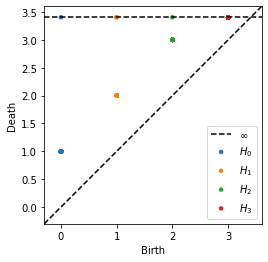

In [23]:
with open("DATA/data.custom_diagrams_coma","rb") as f:
    custom_diagrams_coma=pickle.load(f)
custom_diagrams_coma[0][5]
plot_diagrams(custom_diagrams_coma[0][5])
plt.show()

In [29]:
corr_mat=generate_Erdos_Renyi_correlation_matrix(90,seed=0)
costs=np.linspace(0.5,0.9,2)
dgms=custom_filtration_persistance(corr_mat,costs,[1,2,3,4])

graph list fatta
brain 0.0
0.0


NameError: name 'timer' is not defined

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

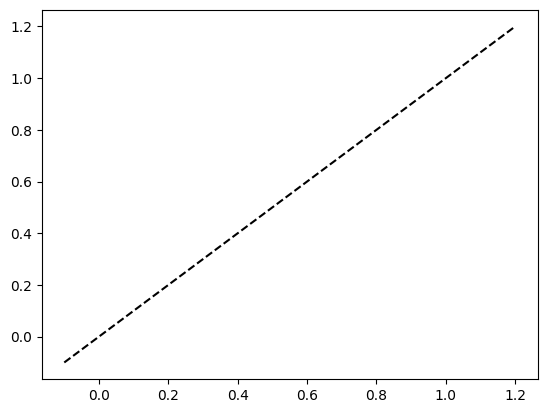

In [30]:
plot_diagrams(dgms[0][1])
plt.show()

#if not isinstance(corr_mat,list):
 #   corr_mat=[corr_mat]


In [31]:
corr_mat=generate_Erdos_Renyi_correlation_matrix(90,seed=0)
adjacency_matrix = generate_graph_sequence(corr_mat,[0.9]) 
adjacency_matrix

/Users/simonechiominto/Dropbox (Politecnico Di Torino Studenti)/grenoble/progetto/project_git/homology_modules/from_corr_to_graph.py:58: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  MST=nx.adjacency_matrix(tree.minimum_spanning_tree(totalgraph).to_undirected()).todense()


[array([[0., 1., 1., ..., 1., 1., 1.],
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.]])]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

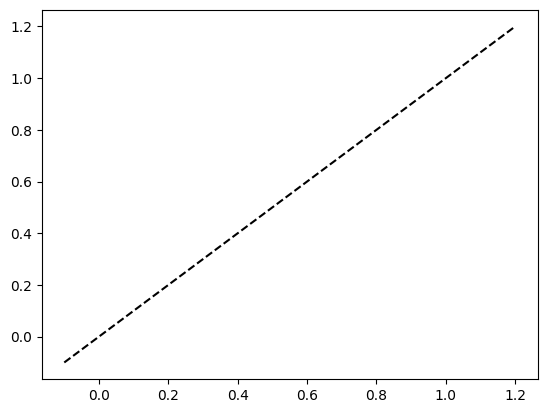

In [32]:
plot_diagrams(dgms[0][0])
plt.show()
dgms[0][0]

In [33]:
G=nx.from_numpy_matrix(adjacency_matrix[0])

In [138]:
path="regional-differentiation-based-on-graph-nodal-statistics-for-functional-brain-connectivity-networks-characterization/DATA/cor_mat_HCP_90"
files=os.listdir(path) #make a list of all the files' names at the path 
cor_mats_HCP_90_df=[pd.read_csv(path+"/"+file,delim_whitespace=True,header=None) for file in files]

In [139]:
path="regional-differentiation-based-on-graph-nodal-statistics-for-functional-brain-connectivity-networks-characterization/DATA/cor_mat_coma"
files=os.listdir(path) #make a list of all the files' names at the path 
cor_mats_coma_df=[pd.read_csv(path+"/"+file,delim_whitespace=True) for file in files]

In [144]:
cor_mats_HCP_90=[df.to_numpy() for df in cor_mats_HCP_90_df]
cor_mats_coma=[df.to_numpy() for df in cor_mats_coma_df]